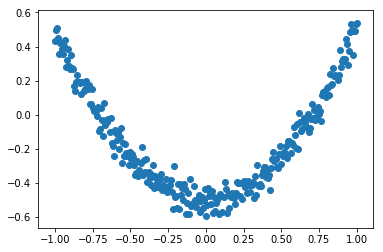

0.4307909
0.015448321
0.009452161
0.007931989
0.0074058217
0.007080176
0.0068378346
0.0066534323
0.0064856247
0.006344426
0.0062171845
0.00609764
0.005984382
0.005879313
0.005773534
0.0056635644
0.0055412776
0.0053821825
0.005197614
0.004999304


In [3]:
#怎么构建一个可视化的tensorboard
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#添加神经网络层
def add_layer(inputs,in_size,out_size,activation_function=None):
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size,out_size]),name='w')
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1,out_size])+0.1,name='b')
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs,Weights),biases)
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        return outputs
    
#生成用于训练的数据
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data)-0.5+noise

#添加用于输入，输出数据的placeholder
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32,[None,1],name='x_input')
    ys = tf.placeholder(tf.float32,[None,1],name='y_input')

#添加隐藏层
l1 = add_layer(xs,1,10,activation_function=tf.nn.relu)

#添加输出层
prediction = add_layer(l1,10,1,activation_function=None)

#设置代价函数
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1]))
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

#神经网络最重要的一步就是初始化全局所有要用到的变量

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

writer = tf.summary.FileWriter('logs/',sess.graph)        #⭐⭐在可视化当中，这一步是很恨重要的。

# #把生成的数据可视化

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()
plt.show()

#开始训练数据
for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i % 50 == 0:
        print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
